<a href="https://colab.research.google.com/github/TacticalCoders/NLP-with-Pytorch/blob/main/3_ANN_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망의 기본 구성 요소

이 장에서는 신경망을 구축하는데 필요한 기본 요소인 활성화 함수, 손실 함수, 옴티마이저, 지도 학습 훈련 방법 등을 소개한다.

## 퍼셉트론(perceptron)

가장 간단한 신경망. 생물학적 뉴런을 본떠 만듦.

퍼셉트론 유닛에는 입력(x), 출력(y)과 3 개의 다이얼, 가중치(w), 절편(b), **활성화 함수(f)**가 있다.

가중치와 절편은 데이터에서 학습되고, 활성화 함수(activation function)는 신경망과 타깃 출력을 기반으로 **설계자의 직관**에 따라 결정된다.

수학적 표현

***y = f(wx+b)***

일반적으로 퍼셉트론에는 입력을 하나 이상 사용한다. 이럴 때는 벡터로 표현할 수 있다. **x**와 **w**는 벡터이고 **x**와 **w**의 곱셉은 점곱(dot product, 스칼라 곱)으로 바뀐다.

활성화 함수는 일반적으로 비선형 함수이다. 여기서 wx+b는 선형 함수이다. 즉, 퍼셉트론은 선형 함수와 비선형 함수의 조합이다. 참고로 선형 함수의 표현 wx+b를 아핀 변환(affine fransform)이라고도 부른다.

In [1]:
# 파이토치로 구현한 퍼셉트론
import torch
import torch.nn as nn

class Perceptron(nn.Module):
  # 퍼셉트론은 하나의 선형 층이다.
  def __init__(self, input_dim): # input_dim(int) 입력 특성의 크기.
    super(Perceptron, self).__init__()
    self.fc1 = nn.Linear(input_dim, 1) # torcg.nn 모듈 아래 가중치와 절편에 필요한 부가 작업과 아핀 변환을 수행해주는 클래스.

  # 퍼셉트론의 정방향 계산
  def forward(self, x_in): # x_in(torch.Tensor): 입력 데이터 텐서, x_in.shape는 (batch, num_features)
    return torch.sigmoid(self.fc1(x_in)).squeeze() # 결과 : 텐서. tensor.shapesms (batch,)


## **활성화 함수**

활성화 함수는 비선형 함수로, 신경망에서 데이터의 복잡한 관계를 감지하는 데 사용한다.



### 시그모이드

신경망 분야의 초창기부터 사용한 활성화 함수다. 

임의의 실숫값을 받아 0과 1 사이의 범위로 압축한다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  after removing the cwd from sys.path.


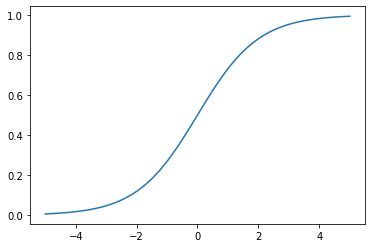

In [3]:
import torch
import matplotlib.pyplot as plt

x = torch.range(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

시그모이드는 입력 범위 대부분에서 매우 빠르게 포화된다.(극단적인 출력을 만든다)

이로 인해 그레이디언트가 0이 되거나 **발산**하여 부동소수 **오버플로**가 되는 문제가 발생한다. 

이런 현상을 각각 그레이디언트 소실 문제(vanishing gradient problem)와 그레이디언트 폭주 문제(exploding gradient problem)라고 부른다. 

이 때문에 신경망에서 시그모이드 활성화 함수는 거의 출력층에서 출력을 확률로 압축하는 데 사용한다.

### 하이퍼볼릭 탄젠트

시그모이드 함수의 변종.

시그모이드처럼 압축 함수이다. 다만 임의이 실수값을 [-1.1]로 바꾸는 점이 다르다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  after removing the cwd from sys.path.


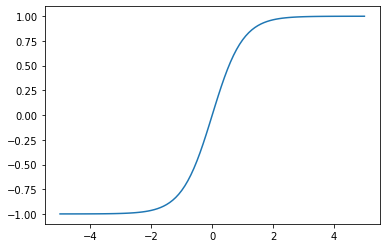

In [4]:
import torch
import matplotlib.pyplot as plt

x = torch.range(-5., 5., 0.1)
y = torch.tanh(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

### 렐루

가장 중요한 활성화 함수. 렐루가 없었다면 최근 딥러닝 혁신의 상당수는 불가능했을 것.

**음수값을 0**으로 자른다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  """


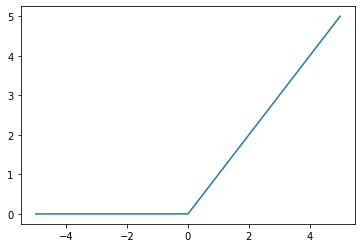

In [6]:
import torch
import matplotlib.pyplot as plt

relu = torch.nn.ReLU()
x = torch.range(-5., 5., 0.1)
y = relu(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

그레이디언트 소실 문제에 도움이 된다. 하지만 시간이 지나서 신경망의 특정 출력이 0이 되면 다시 돌아오지 않는다는 문제가 있다. 이를 '죽은 렐루' 문제라고 한다.

이런 현상을 줄이기 위해 리키 렐루와 PReLU 활성화 함수 같은 변종이 존재한다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  


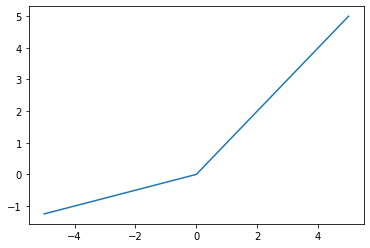

In [9]:
# PReLU
import torch
import matplotlib.pyplot as plt

prelu = torch.nn.PReLU(num_parameters=1)
x = torch.range(-5., 5., 0.1)
y = prelu(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

### 소프트맥스

신경망 유닛의 출력을 0과 1 사이로 압축.

모든 출력의 합으로 각 출력을 나누어 k개 클래스에 대한 이산 확률 분포를 만든다.

소프트맥스 출력의 합은 1이 된다. 이는 분류 작업의 출력을 해석하는 데 매우 유용하다. 따라서 이 함수는 보통 확률 기반의 목적 함수인 범주형 크로 엔트로피와 함께 사용한다.

In [12]:
import torch.nn as nn
import torch

softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[ 1.0962, -0.0815, -0.1109]])
tensor([[0.6223, 0.1916, 0.1861]])
tensor([1.])


이외에도 신경망을 구축하는 데 사용할 수 있는 활성화 함수는 다양하다. 

하지만 일반적으로 널리 사용되는 방식을 따르는 것이 좋다.

## 손실 함수

손실 함수는 정답(y)과 예측(y^)을 입력으로 받아 실숫값 점수를 만든다. 이 **점수가 높을수록 모델의 예측 성능이 나빠진다.**

파이토치는 nn패키지 아래 손실 함수를 많이 구현해 놓았다.

### 평균 제곱 오차 손실(MSE, mean squared error)

신경망의 출력(예측)과 타깃이 연속값이 회귀 문제에서 널리 사용하는 손실 함수이다. 

평균 제곱 오차는 ***예측과 타깃값의 차이를 제곱하여 평균***한 값이다.

회귀 문제에 사용할 수 있는 다른 손실 함수는 평균 절댓값 오차와 평균 제곱근 온차가 있다. 이 함수들은 모두 출력과 타깃 사이의 거리를 실숫값으로 계산한다.

In [13]:
import torch
import torch.nn as nn

mse_loss = nn.MSELoss() # 평균 제곱 오차, mean squared error(MSE)
outputs = torch.randn(3, 5, requires_grad=True) # 예측 (gradient)
targets = torch.randn(3, 5) # 타깃
loss = mse_loss(outputs, targets)
print(loss)

tensor(4.4720, grad_fn=<MseLossBackward0>)


In [14]:
torch.rand(3,5)

tensor([[0.0141, 0.8269, 0.8583, 0.3879, 0.3946],
        [0.1773, 0.4348, 0.6018, 0.6963, 0.5046],
        [0.0277, 0.5742, 0.0376, 0.5118, 0.9376]])

### 범주형 크로스 엔트로피 손실(categorical cross-entropy)

출력을 클래스 소속 확률에 대한 예측을 이해할 수 있는 **다중 분류** 문제에 사용.

타깃은 모든 클래스에 대한 다항 분포를 나타내는 원소 n개로 이루어진 벡터. 하나의 클래스만 정답이면 이 벡터는 원-핫 벡터가 된다. 신경망의 출력도 원소 n개로 구성된 벡터이며 다항 분포에 대한 신경망의 예측을 나타낸다. 범주형 크로스 엔트로피는 이 두 벡터를 비교해 손실을 계산한다. 


In [16]:
# 크로스 엔트로피 손실
import torch
import torch.nn as nn

ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3,5, requires_grad=True) # 신경망의 츨력
targets = torch.tensor([1, 0, 3], dtype=torch.int64) # 정답을 정수벡터.(각 클래스에는 고유한 인텍스가 있다고 가정하기 때문.)
loss = ce_loss(outputs, targets)
print(loss)

tensor(1.2250, grad_fn=<NllLossBackward0>)


### 이진 크로스 엔트로피 손실(BCE, binary cross-entropy)

클래스 두 개를 구별하는 작업인 이진 분류에 효율적.

In [18]:
# 이진 크로스 엔트로피 손실
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4,1, requires_grad=True)) # 시그모이드 함수를 적용해 확률 벡터를 만들어줌. 
target = torch.tensor([1,0,1,0], dtype=torch.float32).view(4,1)
loss = bce_loss(probabilities, target)
print(probabilities)
print(loss)

tensor([[0.8115],
        [0.3148],
        [0.4450],
        [0.4306]], grad_fn=<SigmoidBackward0>)
tensor(0.4900, grad_fn=<BinaryCrossEntropyBackward0>)


## 지도 학습 훈련

**지도 학습**은 레이블된 데이터를 주면 지정된 타깃에 새로운 샘플을 매핑하는 방법을 학습하는 문제이다.

= 모델 **예측**과 **손실 함수**를 사용해 모델의 **파라미터**를 **그레이디언트 기반의 방법으로 최적화**하는 것.

훈련 데이터(훈련 세트) = 샘플과 타깃 쌍.

**모델**은 샘플에 대한 예측을 계산하고, **손실 함수**는 타깃과 비교하여 예측의 **오차**를 측정한다. 훈련의 목표는 그레이디언트 기반의 최적화 알고리즘으로 모델의 파라미터를 조정하여 가능한 한 낮은 손실을 내는 것.

 2차원 직선 하나를 학습하여 클래스 두 개중 하나라 분류하는 예제를 생각해보자. 여기서의 직선은 한 클래스 포인트를 다른 클래스와 구별하는 **결정 경계(decision boindary)** 또는 **초평면(hyperplane)**이라 한다.

### 1. 예제 데이터 만들기

2차원 평면 상에 별과 동그라미를 구분하는 이진 분류를 위해 학습하기 쉬운(선형적으로 구분할 수 있는) 데이터를 만든다.

### 2. 모델 선택

퍼셉트론 모델을 사용할 것이다. 퍼셉트론은 어떤 크기의 입력도 다룰 수 있다. 

일반적인 모델 구축 과정에서 입력 크기는 문제와 데이터에 따라 결정된다. 여기서는 x축 y축 좌표가 입력되니 입력 크기는 2이다. 클래스가 2개 뿐이므로 동그라미와 별에 각각 0과 1 인덱스를 부여한다.

활성화 함수가 시그모이드 이므로 최종 출력은 **점 x가 클래스 1일 확률**이다.

### 3. 확률을 클래스로 변환하기

이진 분류에서는 **결정 경계**를 적용해 확률을 클래스로 바꾸어야 한다. 0.5보다 높으면 1, 낮으면 0인 것으로 하자. 

실전에서 만족스러운 분류 정밀도를 얻으려면 검증 데이터 셋으로 결정계수를 튜닝해야 할 수 있다.(0.5가 아닐 수 있다.)

### 4. 손실 함수 선택

모델의 출력이 확률이라면 가장 적절한 손실 함수는 크로스 엔트로피 기반의 손실 함수이다. 여기서는 **이진 크로스 엔트로피 손실 함수**를 사용한다.

### 5. 옵티마이저 선택

모델이 예측을 만들고, 손실함수가 예측과 타깃의 오차를 측정하면 옵티마이저가 이 오차 신호를 사용해 모델의 가중치를 업데이트 한다.

가장 간단한 구조에서는 학습률(learning rate)라고 부르는 하이퍼 파라미터 하나로 옵티마이저의 업데이트 동작을 제어한다. 오차 신호가 가중치 업데이트에 얼마나 영향을 미치는 지 조절.(학습률이 클수록 가중치가 크게 바뀐다. 너무 작으면 학습 너무 오래 걸림)

따라서 다양한 학습률을 시도해봐야 한다.

파이토치에는 다양한 옵티마이저가 있다. 그중 확률적 경사 하강법(SGD)는 고전적 알고리즘이다. 하지만 어려운 최적화 문제에서 수렴 문제가 발생해 나쁜 모델을 만든다. 따라서 현재 선호하는 옵티마이저는 adagrad나 Adam같은 적응형 옵티마이저다. (시간에 따라 업데이트 정보 사용)

In [19]:
# Adam 옵티마이저.

import torch.nn as nn
import torch.optim as optim

input_dim = 2
lr = 0.001 # 기본 학습률, 웬만하면 건들지 않는게 좋다.

perceptron = Perceptron(input_dim=input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params=perceptron.parameters(), lr=lr)

### 6. 모두 합치기 : 그레이디언트 기반의 지도 학습

학습은 손실계산에서 시작한다. 

즉, 예측이 타깃에서 얼마나 멀리 떨어져 있는지 측정한다. 

결국 손실의 **그레이디언트는 모델 파라미터를 얼마나 많이 바꿔야 하는지를 나타낸는 신호**이다.

각 파라미터의 그레이디언트는 이 파라미터에 대한 **손실값의 순간 변화율(기울기)**을 의미한다.(각 파라미터가 손실 함수에 얼마나 많이 기여하는지)

In [20]:
# 그레이디언트 업데이트 알고리즘

for epoch_i in range(n_epochs):
  for batch_i in range(n_batches):

    # 0단계: 데이터 가져오기
    x_data, y_target = get_toy_data(batch_size)

    # 1단계: 그레이디언트 초기화
    perceptron.zero_grad()

    # 2단계: 모델의 정방향 계산 수행
    y_pred = perceptron(x_data, apply_sigmoid=True)

    # 3단계: 최적하려는 손실 계산하기
    loss = bce_loss(y_pred, y_target)

    # 4단계: 손실 신호를 거꾸로 전파하기
    loss.backward()

    #5단계: 옵티마이저로 업데이트
    optimizer.step()

NameError: ignored

## 부가적인 훈련 개념

### 모델 성능 올바르게 측정하기 : 평가 지표

훈련에 사용하지 않은 데이터를 사용해 성능을 측정해야 한다.

모델은 하나 이사으이 평가 지표(evaluation metric)을 하나 이상 사용해 평가된다.

가장 널리 사용하는 지표는 정확도(accuracy)이다. 훈련하는 동안 만나지 못한 데이터에 대해 올바로 예측한 비율.

### 모델 성능 올바르게 측정하기 : 데이터 분할

최종 목표는 진짜 데이터 분포에 맞게 잘 일반화시키는 것.

좋은 일반화를 달성하려면 데이터셋을 랜덤하게 샘플링 하여 3개(훈련 세트, 검증 세트, 테스트 세트)로 나누거나 k-겹 교차 검증을 사용한다.

3개로 분할 했을 때는 각각 70%, 15%, 15%로 분할하는 것이 일반적이다.

k-겹 교차 검증을 사용한 모델 평가는 데이터 셋을 같은 크기의 폴드 k개로 나눈다. 그리고 폴드 하나를 평가에 사용하고 나머지 k-1개를 훈련에 사용한다. 평가에 사용할 폴드를 바꿔가며 이 과정을 반복한다. 모든 폴드마다 평가하여 k개의 정확도 값을 만들고, 평균과 표준차를 계산해 최종 정확도를 낸다. 

### 훈련 중지 시점 파악하기

에포크를 어느정도 반복해야 할까? 

조기 종료(early stopping)은 에포크마다 검증 데이터셋에 대한 성능을 기록하고 성능이 더 좋아지지 않을 때를 감지한다. 성능이 계속 좋아지지 않으면 훈련을 종료한다. 

훈련을 종료하기 전에 기다리는 에포크 횟수를 **인내(patience)**라고 한다. 

모델이 어떤 데이터셋에서 개선되지 않는 지점을 모델이 수렴된 곳이라 한다.

#### 최적의 하이퍼파라미터 찾기

옵티마이저는 미니배치로 파라미터의 값을 조정한다.

하이퍼 파라미터는 모델 파라미터에 영향을 미치는 사람이 지정하는 모든 모델 설정을 말한다.

*    손실함수
*    옵티마이저
*    옵티마이저의 학습률
*    층 크기
*    조기 종료하기 전에 인내할 에포크 수
*    규제 방법

### 규제

수치 최적화 이론에서 유래했다.

대부분의 데이터셋과 작업에서 가능한 여러 모델을 찾을 수 있다. 매우 곡선이 심한 그래프와 완만한 그래프가 있을 때 완만한 것이 낫다. 이렇게 부드럽게 만드는 제약을 L2규제라 한다.

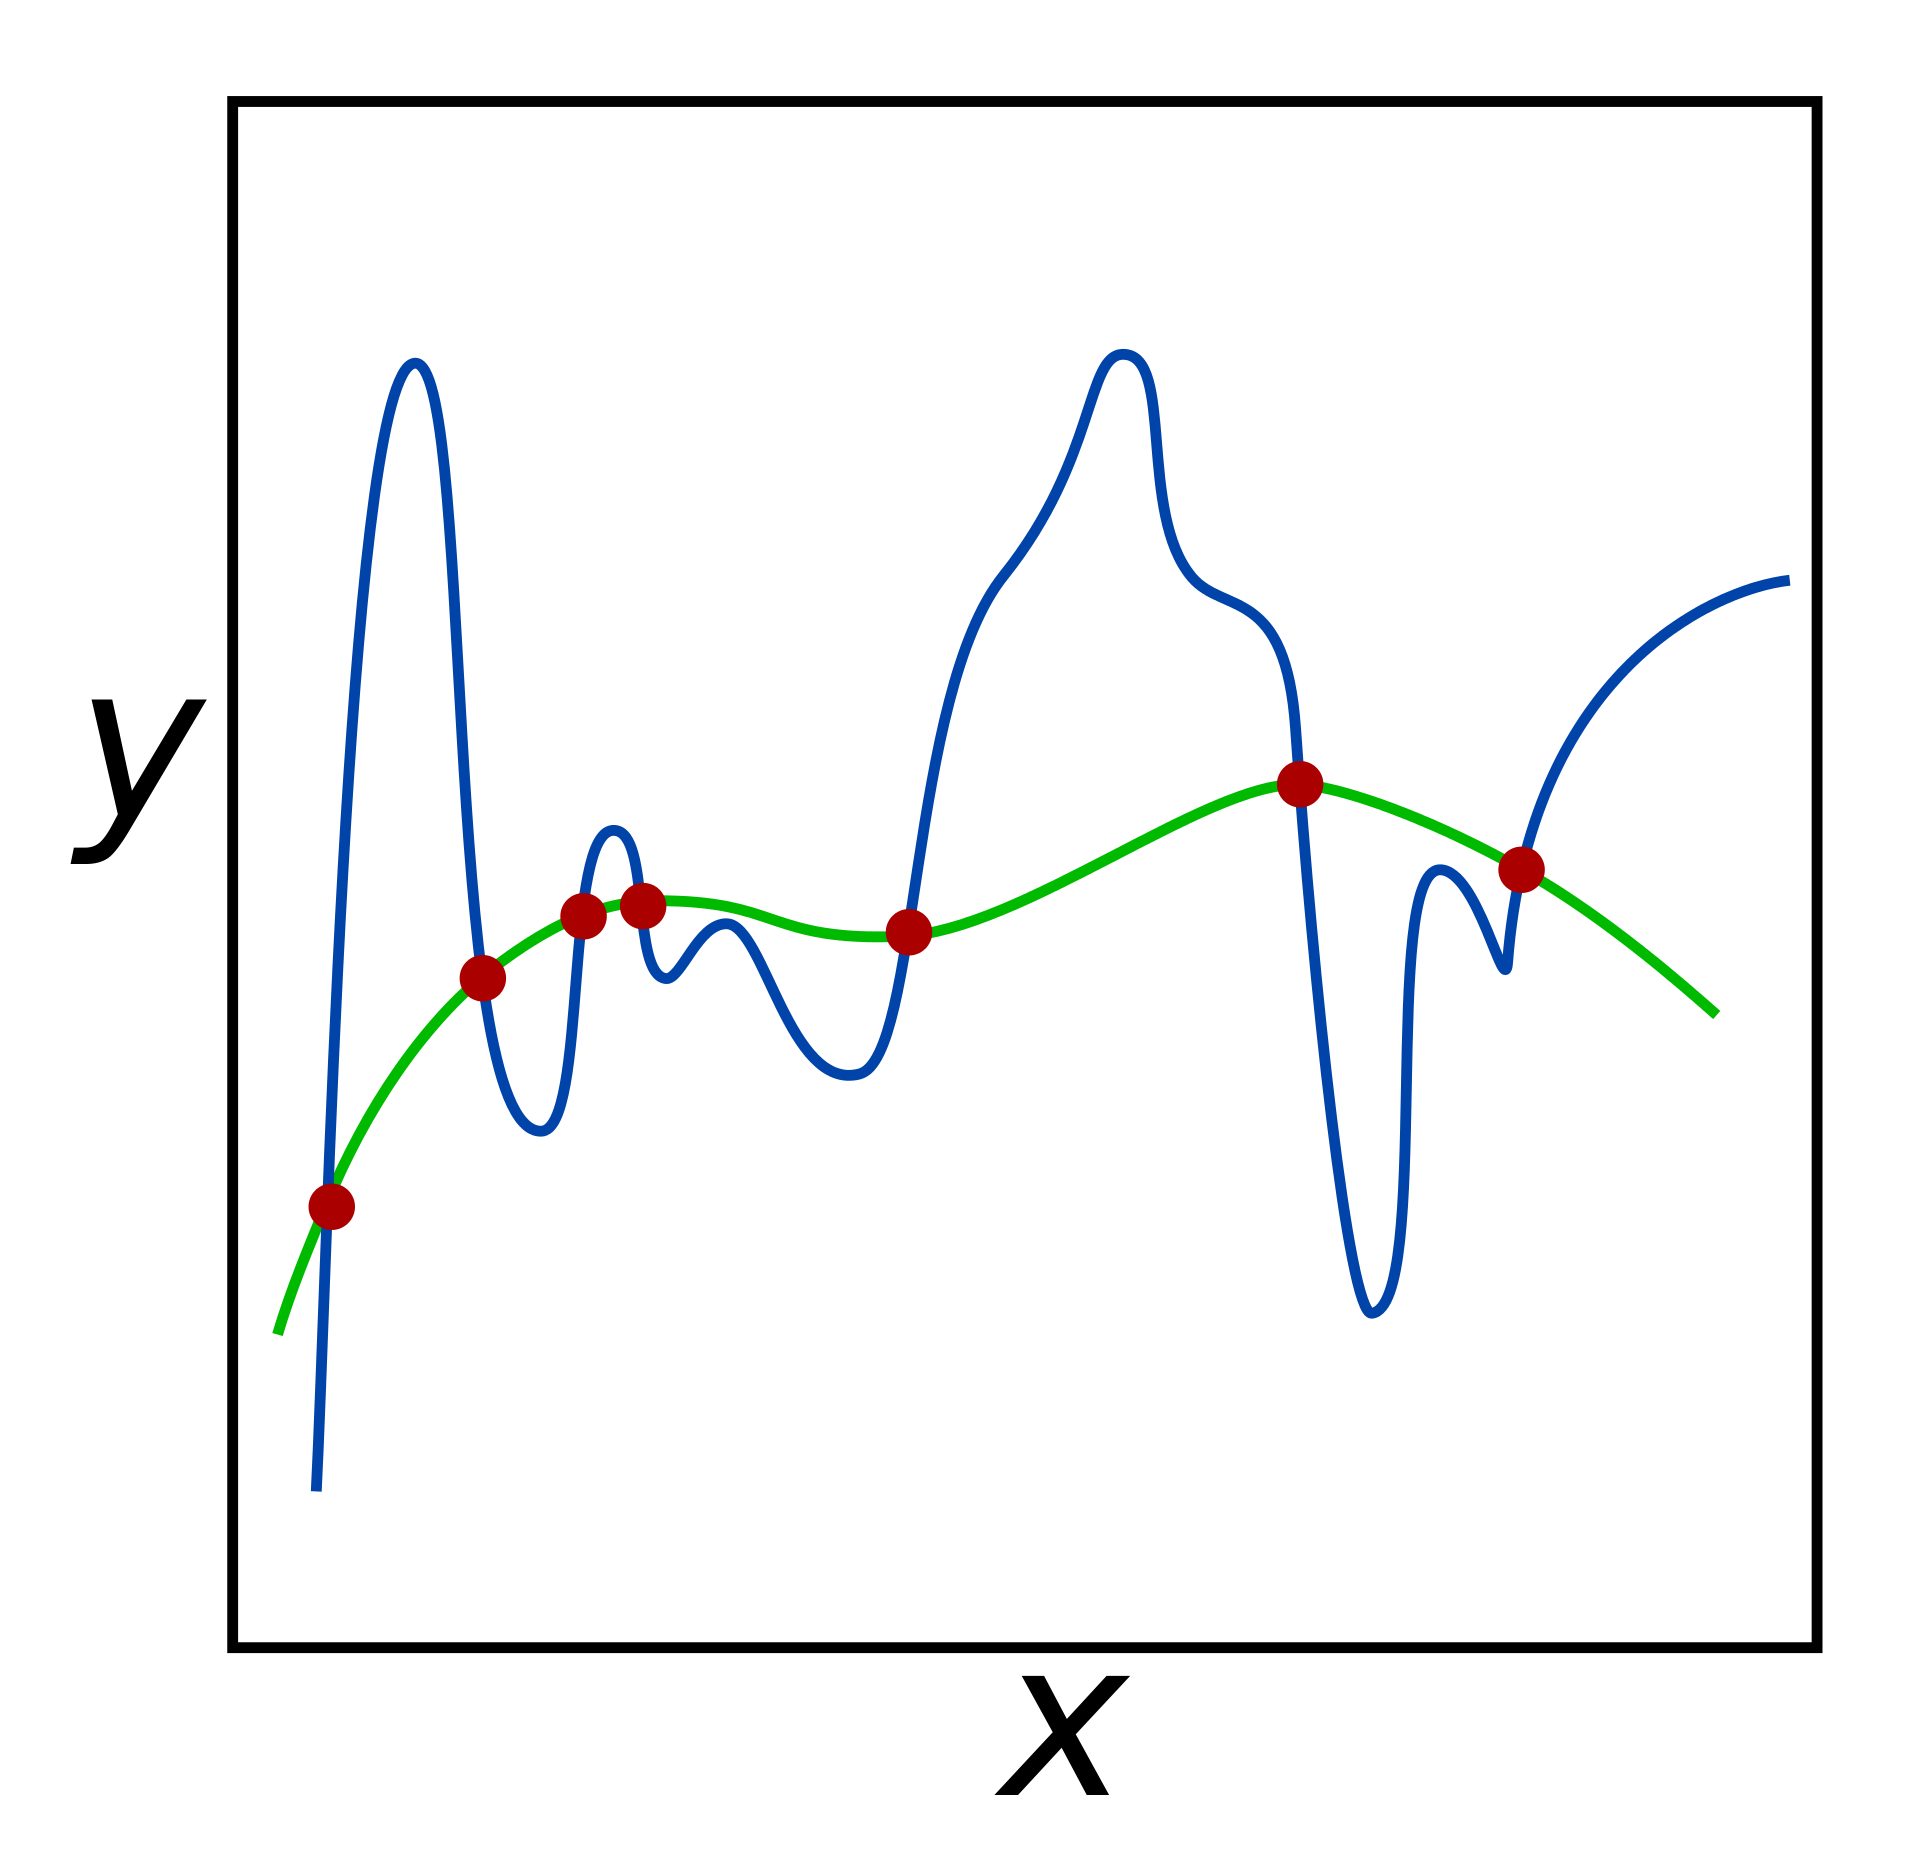

L1 규제는 대부분의 모델 파라미터가 0에 가깝다. 희소한 솔루션을 만드는데 사용한다.